In [2]:
pip install cmake dlib face_recognition opencv-python numpy

     |████████████████████████████████| 100.2MB 106kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566176 sha256=5ab8f619b18f06439c860e65ca20a1bb057ea73b732096688537591ac73d18ad
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [14]:
from google.colab import drive
drive.mount('/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/


In [15]:
%cd /gdrive/My\ Drive/Face_Detection

/gdrive/My Drive/Face_Detection


In [0]:
import face_recognition as fr
import cv2 
import os,shutil
import numpy as np
from google.colab.patches import cv2_imshow

In [13]:
ls

sample_data/


In [0]:
# encode all images o face folder which is our db

def get_encoded_faces():
  # list of all encoded faces with their names
  encoded ={}
  for dirpath, dname, fname in os.walk("./faces"):
    for f in fname:
      if f.endswith(".jpg") or f.endswith(".png"):
        face= fr.load_image_file("faces/"+f)
        encoding=fr.face_encodings(face)[0]
        encoded[f.split(".")[0]]=encoding
  return encoded


In [0]:
x=get_encoded_faces()

In [0]:
x

In [0]:
def classify_face(im):
  faces= get_encoded_faces()
  face_encoded= list(faces.values())
  known_face_names=list(faces.keys())

  img= cv2.imread(im)
  face_locations= fr.face_locations(img)
  unknown_face_encodings=fr.face_encodings(img, face_locations)

  face_names=[]
  for face_encoding in unknown_face_encodings:
    name= "Unknown"
    matches = fr.compare_faces(face_encoded, face_encoding)

    face_distances= fr.face_distance(face_encoded, face_encoding)
    best_match_index= np.argmin(face_distances)
    if matches[best_match_index]:
      name= known_face_names[best_match_index]
    face_names.append(name)

    for(top,right,bottom,left), name in zip(face_locations,face_names):
      cv2.rectangle(img,(left-20,top-20), (right+20, bottom+20),(255,0,0),2)
      cv2.rectangle(img,(left-20,bottom-15), (right+20, bottom+20),(255,0,0),cv2.FILLED)
      cv2.putText(img,name,(left-20,bottom+15),cv2.FONT_HERSHEY_DUPLEX, 0.5, (255,255,255),1)
  while True:
    cv2_imshow(img)
    return face_names
    
     



In [0]:
classify_face("test2.jpg")

In [0]:
# images from user input to database
def learning(image):
  c_face= classify_face(image)
  if "Unknown" in c_face:
    # ask a iamge name for it
    que=input("There is an unknown image , enter the name of that person")
    if que=="yes" or que=="Yes":
      imagefilename=input("ENTER IAMGEFILE NAME")
      shutil.move(imagefilename, '/gdrive/My\ Drive/Face_Detection/faces ')
      print(learning(image))
    else:
      print(c_face)
  else:
    print(c_face)

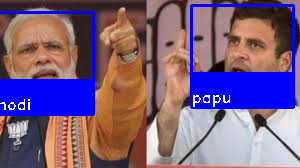

['papu', 'modi']


In [38]:
learning("test5.jpg")